<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-06-30 20:57:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.7’

m4_survey_data.sqli 100%[===================>]  34.98M  27.0MB/s    in 1.3s    

2021-06-30 20:57:58 (27.0 MB/s) - ‘m4_survey_data.sqlite.7’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY1 = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY1,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


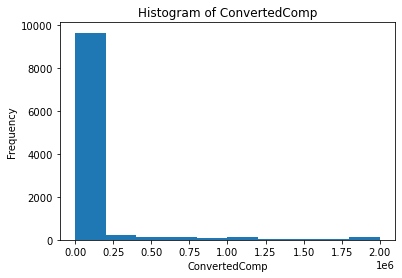

In [8]:
# your code goes here
query2 = "select * from master"
df = pd.read_sql_query(query2,conn)

df["ConvertedComp"].plot(kind="hist")
plt.title("Histogram of ConvertedComp")
plt.ylabel("Frequency")
plt.xlabel("ConvertedComp")
plt.show()

### Box Plots


Plot a box plot of `Age.`


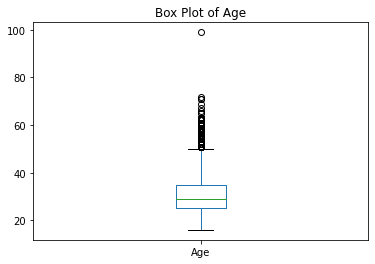

In [9]:
# your code goes here

box = df["Age"].plot(kind="box")
plt.title("Box Plot of Age")
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


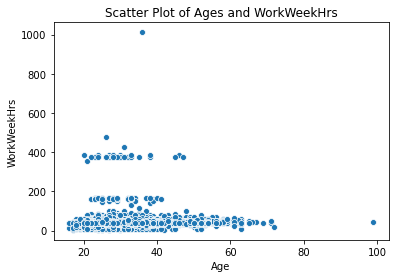

In [10]:
# your code goes here
sns.scatterplot(x="Age",y="WorkWeekHrs",data=df)
plt.title("Scatter Plot of Ages and WorkWeekHrs")
plt.ylabel("WorkWeekHrs")
plt.xlabel("Age")
plt.show()

In [11]:
df.corr()["Age"]

index            0.004177
Respondent       0.004048
CompTotal        0.006966
ConvertedComp    0.105412
WorkWeekHrs      0.036517
CodeRevHrs      -0.020498
Age              1.000000
Name: Age, dtype: float64

In [12]:
df.corr()["WorkWeekHrs"]

index           -0.015365
Respondent      -0.015314
CompTotal        0.003510
ConvertedComp    0.021143
WorkWeekHrs      1.000000
CodeRevHrs       0.026517
Age              0.036517
Name: WorkWeekHrs, dtype: float64

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


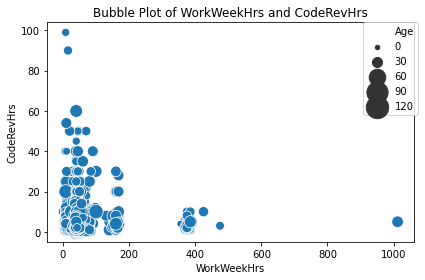

In [13]:
# your code goes here
sns.scatterplot(x="WorkWeekHrs",
                y="CodeRevHrs",
                size=df["Age"],
                sizes = (20, 500),
                data = df)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.title("Bubble Plot of WorkWeekHrs and CodeRevHrs")
plt.ylabel("CodeRevHrs")
plt.xlabel("WorkWeekHrs")
plt.tight_layout()
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


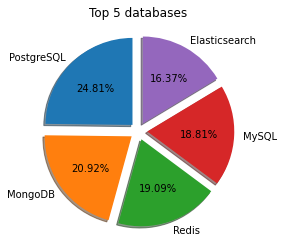

In [14]:
# your code goes here
QUERY3="""
select COUNT(DatabaseDesireNextYear)as Count, DatabaseDesireNextYear
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT(DataBaseDesireNextYear) DESC LIMIT 5"""

pie_df=pd.read_sql_query(QUERY3,conn)
label=pie_df["DatabaseDesireNextYear"]
sizes=pie_df.iloc[:,0]
plt.pie(sizes,labels=label, startangle=90, explode=(0.1,0.1,0.1,0.1,0.1),shadow=True, autopct='%1.2f%%')
plt.title("Top 5 databases")
plt.show()

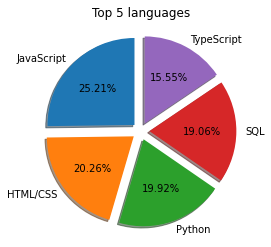

In [15]:
# your code goes here
QUERY4="""
select COUNT(LanguageDesireNextYear)as Count, LanguageDesireNextYear
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY COUNT(LanguageDesireNextYear) DESC LIMIT 5"""

langpie_df=pd.read_sql_query(QUERY4,conn)
label=langpie_df["LanguageDesireNextYear"]
sizes=langpie_df.iloc[:,0]
plt.pie(sizes,labels=label, startangle=90, explode=(0.1,0.1,0.1,0.1,0.1),shadow=True, autopct='%1.2f%%')
plt.title("Top 5 languages")
plt.show()

In [16]:
#how many respondents currently work with SQL
QUERY5="""
SELECT COUNT(Respondent) FROM LanguageWorkedWith
WHERE LanguageWorkedWith='SQL'"""

pd.read_sql_query(QUERY5,conn)

,COUNT(Respondent)
0,7106


In [17]:
#how many respondents work on MySQL Only
QUERY6  = "select * from DatabaseWorkedWith"
df_dbww = pd.read_sql_query(QUERY6,conn)
df_dbww.head()
df_dbww_nodupe = df_dbww.drop_duplicates(subset=["Respondent"],keep=False)
df_dbww_nodupe = df_dbww_nodupe.groupby("DatabaseWorkedWith").agg({"Respondent":"count"})
df_dbww_nodupe.sort_values(by = ["Respondent"],ascending=False)

,Respondent
DatabaseWorkedWith,
Microsoft SQL Server,845
MySQL,474
PostgreSQL,351
SQLite,192
MongoDB,170
Oracle,162
Other(s):,94
Firebase,90
MariaDB,44


In [18]:
#Find majority devtype of survey responders
QUERY7  = "select * from DevType"
df_devtype = pd.read_sql_query(QUERY7,conn)
df_devtype = df_devtype.groupby("DevType").agg({"Respondent":"count"})
df_devtype.sort_values(by = ["Respondent"],ascending=False)

,Respondent
DevType,
"Developer, full-stack",6928
"Developer, back-end",6290
"Developer, front-end",3920
"Developer, desktop or enterprise applications",2575
"Developer, mobile",1959
DevOps specialist,1639
Database administrator,1413
System administrator,1202
Designer,988


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


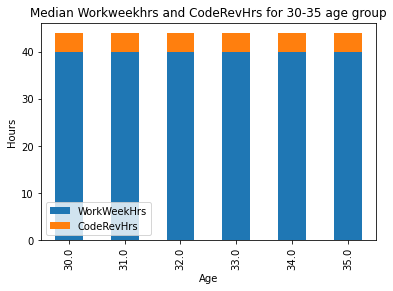

In [19]:
# your code goes here
QUERY8="""
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master 
where Age between 30 and 35
"""

df_medhrs = pd.read_sql_query(QUERY8,conn)

df_medhrs = df_medhrs.groupby("Age").median()


df_medhrs.plot(kind="bar",stacked=True)
plt.title("Median Workweekhrs and CodeRevHrs for 30-35 age group")
plt.xlabel("Age")
plt.ylabel("Hours")
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


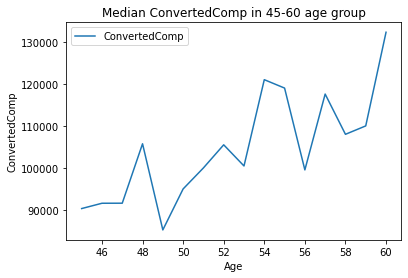

In [20]:
# your code goes here

QUERY9 = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""

df_ccline = pd.read_sql_query(QUERY9,conn)

df_ccline=df_ccline.groupby("Age").median()

df_ccline.plot(kind="line")
plt.title("Median ConvertedComp in 45-60 age group")
plt.xlabel("Age")
plt.ylabel("ConvertedComp")
plt.show()

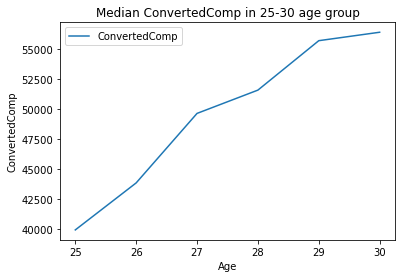

In [21]:
# Line Chart of Age and median ConvertedComp for the age group 25-30

QUERY10 = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30
"""

df_ccline = pd.read_sql_query(QUERY10,conn)

df_ccline=df_ccline.groupby("Age").median()

df_ccline.plot(kind="line")
plt.title("Median ConvertedComp in 25-30 age group")
plt.xlabel("Age")
plt.ylabel("ConvertedComp")
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


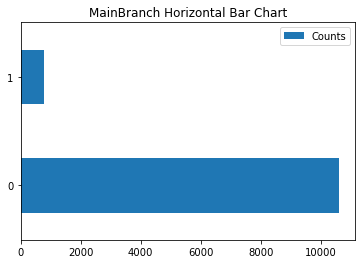

In [23]:
# your code goes here
QUERY9 = """
SELECT MainBranch
FROM master
"""
df_mbhbc = pd.read_sql_query(QUERY9,conn)
df_mbhbc=df_mbhbc["MainBranch"].value_counts().rename_axis("MainBranch").reset_index(name="Counts")


df_mbhbc.plot(kind="barh")
plt.title("MainBranch Horizontal Bar Chart")
plt.show()


Close the database connection.

In [24]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
